
1. Problem 1:
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance

2. Problem 2:
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.

3. Problem 3:
Identify which all stocks are moving together and which all stocks are different from
each other.

NOTE:The solution shared through Github should contain the source code used and the screenshot of the output.

3.Output:

This project consists of 30.00 marks and has to be submitted in .ipynb/PDF format.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data_stocks.csv')

In [3]:
data.head()

DATE      SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  \
0  1491226200  2363.6101     42.3300     143.6800     129.6300      82.040   
1  1491226260  2364.1001     42.3600     143.7000     130.3200      82.080   
2  1491226320  2362.6799     42.3100     143.6901     130.2250      82.030   
3  1491226380  2364.3101     42.3700     143.6400     130.0729      82.000   
4  1491226440  2364.8501     42.5378     143.6600     129.8800      82.035   

   NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  ...  NYSE.WYN  NYSE.XEC  \
0    102.2300      85.2200       59.760       121.52  ...    84.370   119.035   
1    102.1400      85.6500       59.840       121.48  ...    84.370   119.035   
2    102.2125      85.5100       59.795       121.93  ...    84.585   119.260   
3    102.1400      85.4872       59.620       121.44  ...    84.460   119.260   
4    102.0600      85.7001       59.620       121.60  ...    84.470   119.610   

   NYSE.XEL  NYSE.XL  NYSE.XOM  NYSE.XRX  NYSE.XYL  NYSE.YUM  NYSE.ZBH  \
0     44.40    39.88     82.03      7.36     50.22     63.86   122.000   
1     44.11    39.88     82.03      7.38     50.22     63.74   121.770   
2     44.09    39.98     82.02      7.36     50.12     63.75   121.700   
3     44.25    39.99     82.02      7.35     50.16     63.88   121.700   
4     44.11    39.96     82.03      7.36     50.20     63.91   121.695   

   NYSE.ZTS  
0    53.350  
1    53.350  
2    53.365  
3    53.380  
4    53.240  

[5 rows x 502 columns]

In [4]:
data.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [6]:
data.isna().sum()

DATE           0
SP500          0
NASDAQ.AAL     0
NASDAQ.AAPL    0
NASDAQ.ADBE    0
              ..
NYSE.XRX       0
NYSE.XYL       0
NYSE.YUM       0
NYSE.ZBH       0
NYSE.ZTS       0
Length: 502, dtype: int64

In [7]:
data.shape

(41266, 502)

In [8]:
data['DATE'].dtype

dtype('int64')

In [9]:
# As we observed from the stock_data header,
# Date is in UNIX format which need to converted to make this dataset in readable format
data['DATE'] = pd.to_datetime(data['DATE'],unit='s')

In [10]:
data['DATE'].dtype

dtype('<M8[ns]')

In [11]:
data['DATE'].head()

0   2017-04-03 13:30:00
1   2017-04-03 13:31:00
2   2017-04-03 13:32:00
3   2017-04-03 13:33:00
4   2017-04-03 13:34:00
Name: DATE, dtype: datetime64[ns]

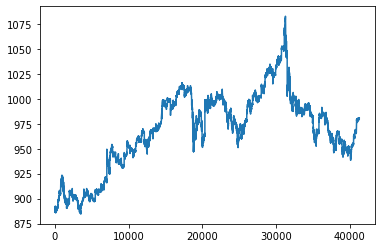

In [12]:
data['NASDAQ.AMZN'].plot()

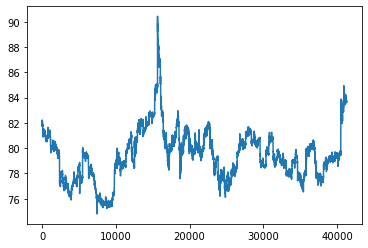

In [13]:
data['NASDAQ.ADI'].plot()

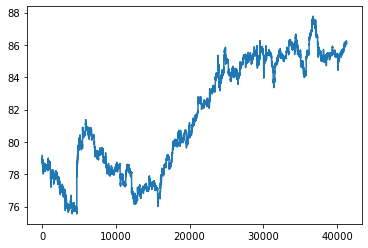

In [14]:
data['NYSE.AXP'].plot()

In [15]:
stocks_data = data.copy()

In [16]:
stocks_data.set_index('DATE')

SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  \
DATE                                                                   
2017-04-03 13:30:00  2363.6101     42.3300     143.6800     129.6300   
2017-04-03 13:31:00  2364.1001     42.3600     143.7000     130.3200   
2017-04-03 13:32:00  2362.6799     42.3100     143.6901     130.2250   
2017-04-03 13:33:00  2364.3101     42.3700     143.6400     130.0729   
2017-04-03 13:34:00  2364.8501     42.5378     143.6600     129.8800   
...                        ...         ...          ...          ...   
2017-08-31 19:56:00  2472.2200     44.7200     164.1100     155.0900   
2017-08-31 19:57:00  2471.7700     44.7300     164.1200     155.1600   
2017-08-31 19:58:00  2470.0300     44.7400     164.0100     155.0650   
2017-08-31 19:59:00  2471.4900     44.7100     163.8800     154.9600   
2017-08-31 20:00:00  2471.4900     44.7400     163.9800     155.1600   

                     NASDAQ.ADI  NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  \
DATE                                                                    
2017-04-03 13:30:00      82.040    102.2300      85.2200       59.760   
2017-04-03 13:31:00      82.080    102.1400      85.6500       59.840   
2017-04-03 13:32:00      82.030    102.2125      85.5100       59.795   
2017-04-03 13:33:00      82.000    102.1400      85.4872       59.620   
2017-04-03 13:34:00      82.035    102.0600      85.7001       59.620   
...                         ...         ...          ...          ...   
2017-08-31 19:56:00      83.670    106.5650     114.4900       47.150   
2017-08-31 19:57:00      83.650    106.5900     114.5200       47.150   
2017-08-31 19:58:00      83.620    106.5200     114.4700       47.150   
2017-08-31 19:59:00      83.580    106.4000     114.3300       47.135   
2017-08-31 20:00:00      83.690    106.4700     114.4600       47.150   

                     NASDAQ.ALXN  NASDAQ.AMAT  ...  NYSE.WYN  NYSE.XEC  \
DATE                                           ...                       
2017-04-03 13:30:00      121.520       38.990  ...    84.370   119.035   
2017-04-03 13:31:00      121.480       39.010  ...    84.370   119.035   
2017-04-03 13:32:00      121.930       38.910  ...    84.585   119.260   
2017-04-03 13:33:00      121.440       38.840  ...    84.460   119.260   
2017-04-03 13:34:00      121.600       38.930  ...    84.470   119.610   
...                          ...          ...  ...       ...       ...   
2017-08-31 19:56:00      142.425       45.130  ...    99.675    99.530   
2017-08-31 19:57:00      142.450       45.130  ...    99.730    99.630   
2017-08-31 19:58:00      142.330       45.135  ...    99.735    99.640   
2017-08-31 19:59:00      142.170       45.065  ...    99.700    99.630   
2017-08-31 20:00:00      142.410       45.120  ...    99.670    99.640   

                     NYSE.XEL  NYSE.XL  NYSE.XOM  NYSE.XRX  NYSE.XYL  \
DATE                                                                   
2017-04-03 13:30:00    44.400   39.880    82.030     7.360    50.220   
2017-04-03 13:31:00    44.110   39.880    82.030     7.380    50.220   
2017-04-03 13:32:00    44.090   39.980    82.020     7.360    50.120   
2017-04-03 13:33:00    44.250   39.990    82.020     7.350    50.160   
2017-04-03 13:34:00    44.110   39.960    82.030     7.360    50.200   
...                       ...      ...       ...       ...       ...   
2017-08-31 19:56:00    49.485   40.955    76.360    32.285    62.110   
2017-08-31 19:57:00    49.480   40.960    76.370    32.295    62.100   
2017-08-31 19:58:00    49.495   40.940    76.315    32.290    62.090   
2017-08-31 19:59:00    49.485   40.925    76.300    32.275    62.075   
2017-08-31 20:00:00    49.490   40.940    76.320    32.270    62.070   

                     NYSE.YUM  NYSE.ZBH  NYSE.ZTS  
DATE                                               
2017-04-03 13:30:00     63.86   122.000   53.3500  
2017-04-03 13:31:00     63.74   121.770   53.3500  
2017-04-03 13:32:00     63.75 

In [17]:
# Create DF_list -> Dictionary which contains all the stocks data items with the values as Open, Close, High, Low
# Create DF_list1 -> Dictionary which contains all the stocks data items with the Closing values
DF_list = {}
DF_list1 = {}
df2 = pd.DataFrame()
for column in stocks_data.columns[1:]:
    try :
        df_col = column.split('.')[1]   ### NASDAQ.AAL will be AAL
        #print(df_col)
    except :
        df_col = column        
        
    Open = stocks_data.groupby([stocks_data['DATE'].dt.date])[column].first()
    Low = stocks_data.groupby([stocks_data['DATE'].dt.date])[column].min()
    High = stocks_data.groupby([stocks_data['DATE'].dt.date])[column].max()
    Close = stocks_data.groupby([stocks_data['DATE'].dt.date])[column].last()
        
    df = pd.DataFrame([Open,Close,Low,High])
    #df1 = pd.concat([df1,Close])
    df1 = pd.DataFrame([Close])
    
    df = df.transpose()
    df1 = df1.transpose()
    
    df.columns = ['Open','Low','High','Close']
    df1.columns = [df_col]
    
    DF_list[df_col] = df
    DF_list1[df_col] = df1
    #df2.join(df1)
    #print(df.head())

In [27]:
Close, Open

(DATE
 2017-04-03    53.175
 2017-04-04    52.640
 2017-04-05    52.670
 2017-04-06    52.680
 2017-04-07    52.550
                ...  
 2017-08-25    61.350
 2017-08-28    61.520
 2017-08-29    61.500
 2017-08-30    61.920
 2017-08-31    62.680
 Name: NYSE.ZTS, Length: 106, dtype: float64,
 DATE
 2017-04-03    53.350
 2017-04-04    53.175
 2017-04-05    52.640
 2017-04-06    52.670
 2017-04-07    52.680
                ...  
 2017-08-25    61.390
 2017-08-28    61.350
 2017-08-29    61.520
 2017-08-30    61.500
 2017-08-31    61.920
 Name: NYSE.ZTS, Length: 106, dtype: float64)

In [18]:
# Create a DataFrame df5 (Merge all the stock data present in the dictionary DF_list1)
df5 = DF_list1['AAL'].reset_index()
for item in DF_list1.keys():
    df5 = pd.merge(df5,DF_list1[item].reset_index())
df5.index = df5['DATE']
df5 = df5.drop('DATE', axis=1)

In [19]:
# View header of the merged DataFrame df5
df5.head()

AAL      SP500     AAPL    ADBE    ADI     ADP   ADSK   AKAM  \
DATE                                                                         
2017-04-03  42.48  2358.9600  143.700  129.62  81.22  101.27  85.39  58.10   
2017-04-04  40.90  2359.9600  144.770  130.04  81.24  101.45  84.95  59.30   
2017-04-05  41.31  2352.8401  144.020  129.89  80.04  101.93  83.54  58.80   
2017-04-06  41.72  2357.6699  143.685  130.15  80.32  101.75  84.07  58.73   
2017-04-07  41.81  2355.6899  143.340  130.22  80.01  102.19  84.79  58.10   

              ALXN   AMAT  ...    WYN     XEC    XEL     XL    XOM   XRX  \
DATE                       ...                                             
2017-04-03  119.28  38.89  ...  84.01  118.11  44.39  39.39  82.08  7.25   
2017-04-04  118.30  39.00  ...  84.18  119.92  44.50  39.71  82.34  7.22   
2017-04-05  116.21  38.38  ...  84.34  117.65  44.81  39.37  82.53  7.15   
2017-04-06  115.49  38.59  ...  85.17  118.14  44.60  39.80  83.02  7.13   
2017-04-07  115.62  38.93  ...  84.69  118.22  44.40  39.82  82.78  7.13   

              XYL    YUM     ZBH     ZTS  
DATE                                      
2017-04-03  49.43  63.55  121.35  53.175  
2017-04-04  50.36  63.84  120.78  52.640  
2017-04-05  50.41  63.87  120.17  52.670  
2017-04-06  50.93  64.56  120.22  52.680  
2017-04-07  50.84  64.28  119.88  52.550  

[5 rows x 501 columns]

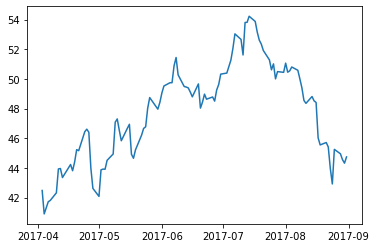

In [20]:
# Plot stock AAL
plt.plot(df5['AAL'])

Text(0, 0.5, 'Price')

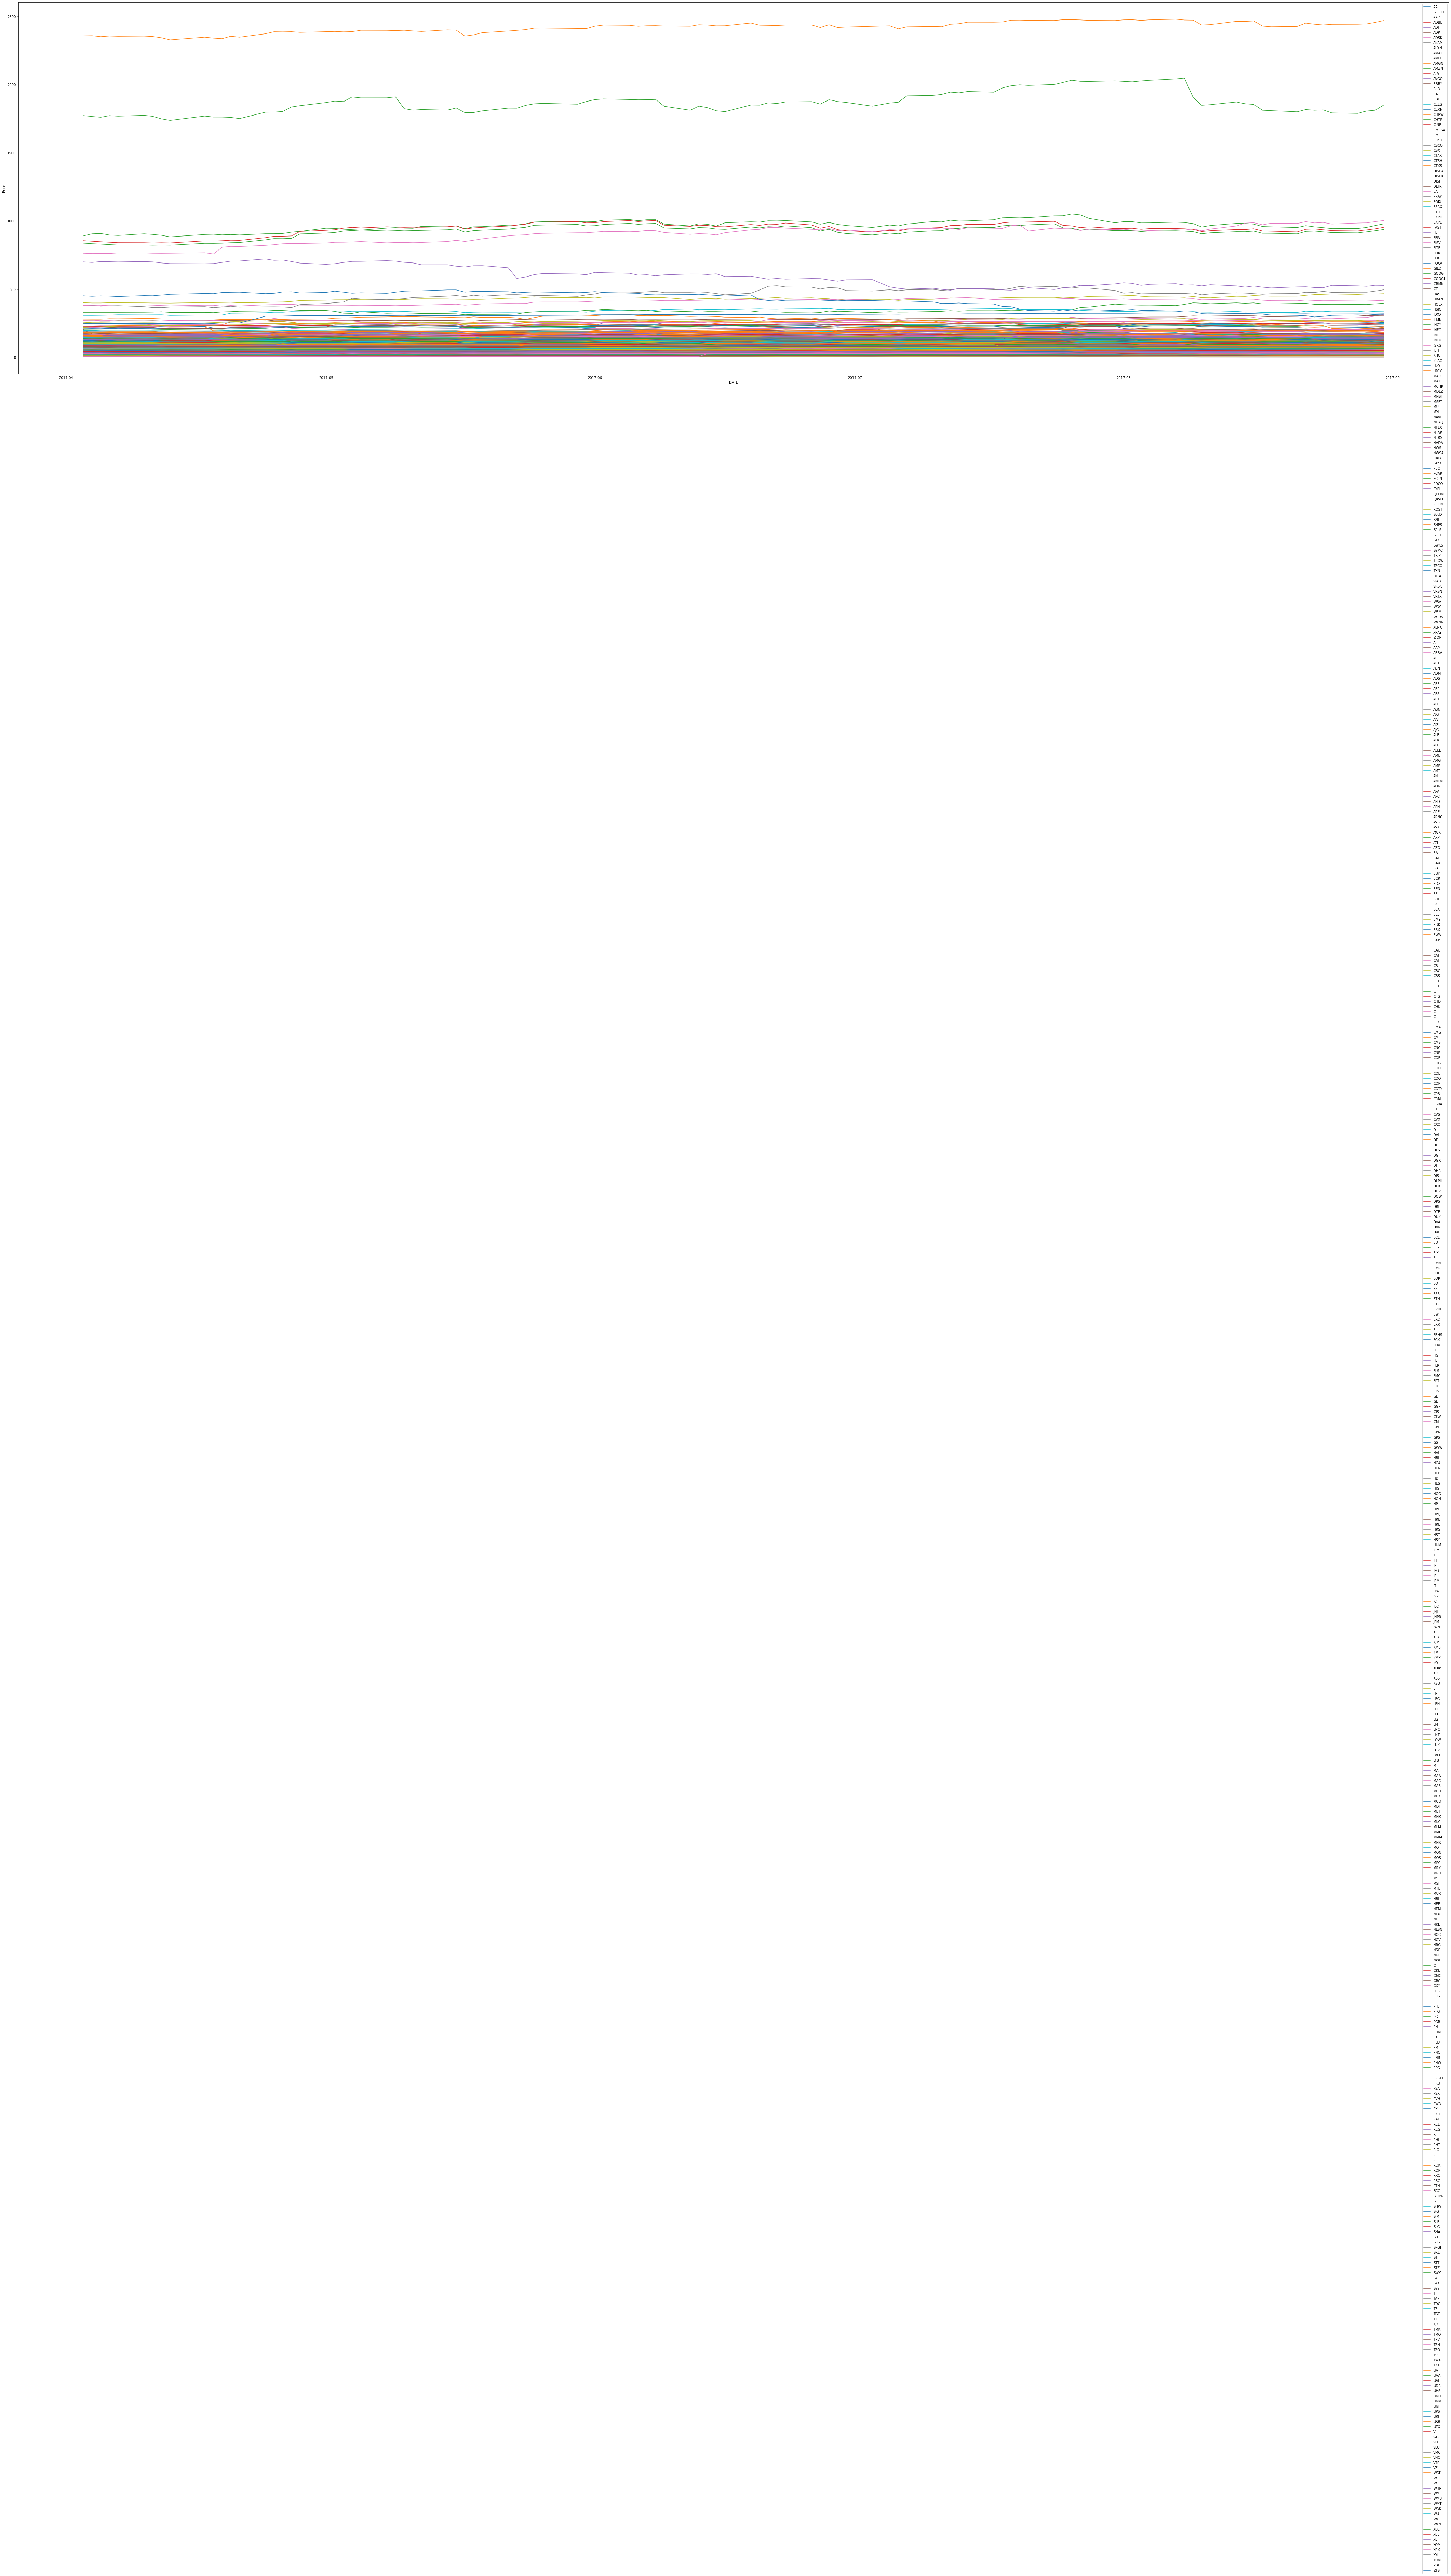

In [21]:
# Plot stocks present in the DataFrame df5
df5.plot(figsize=(75,20))
plt.ylabel('Price')

Text(0, 0.5, 'Return From Start Price')

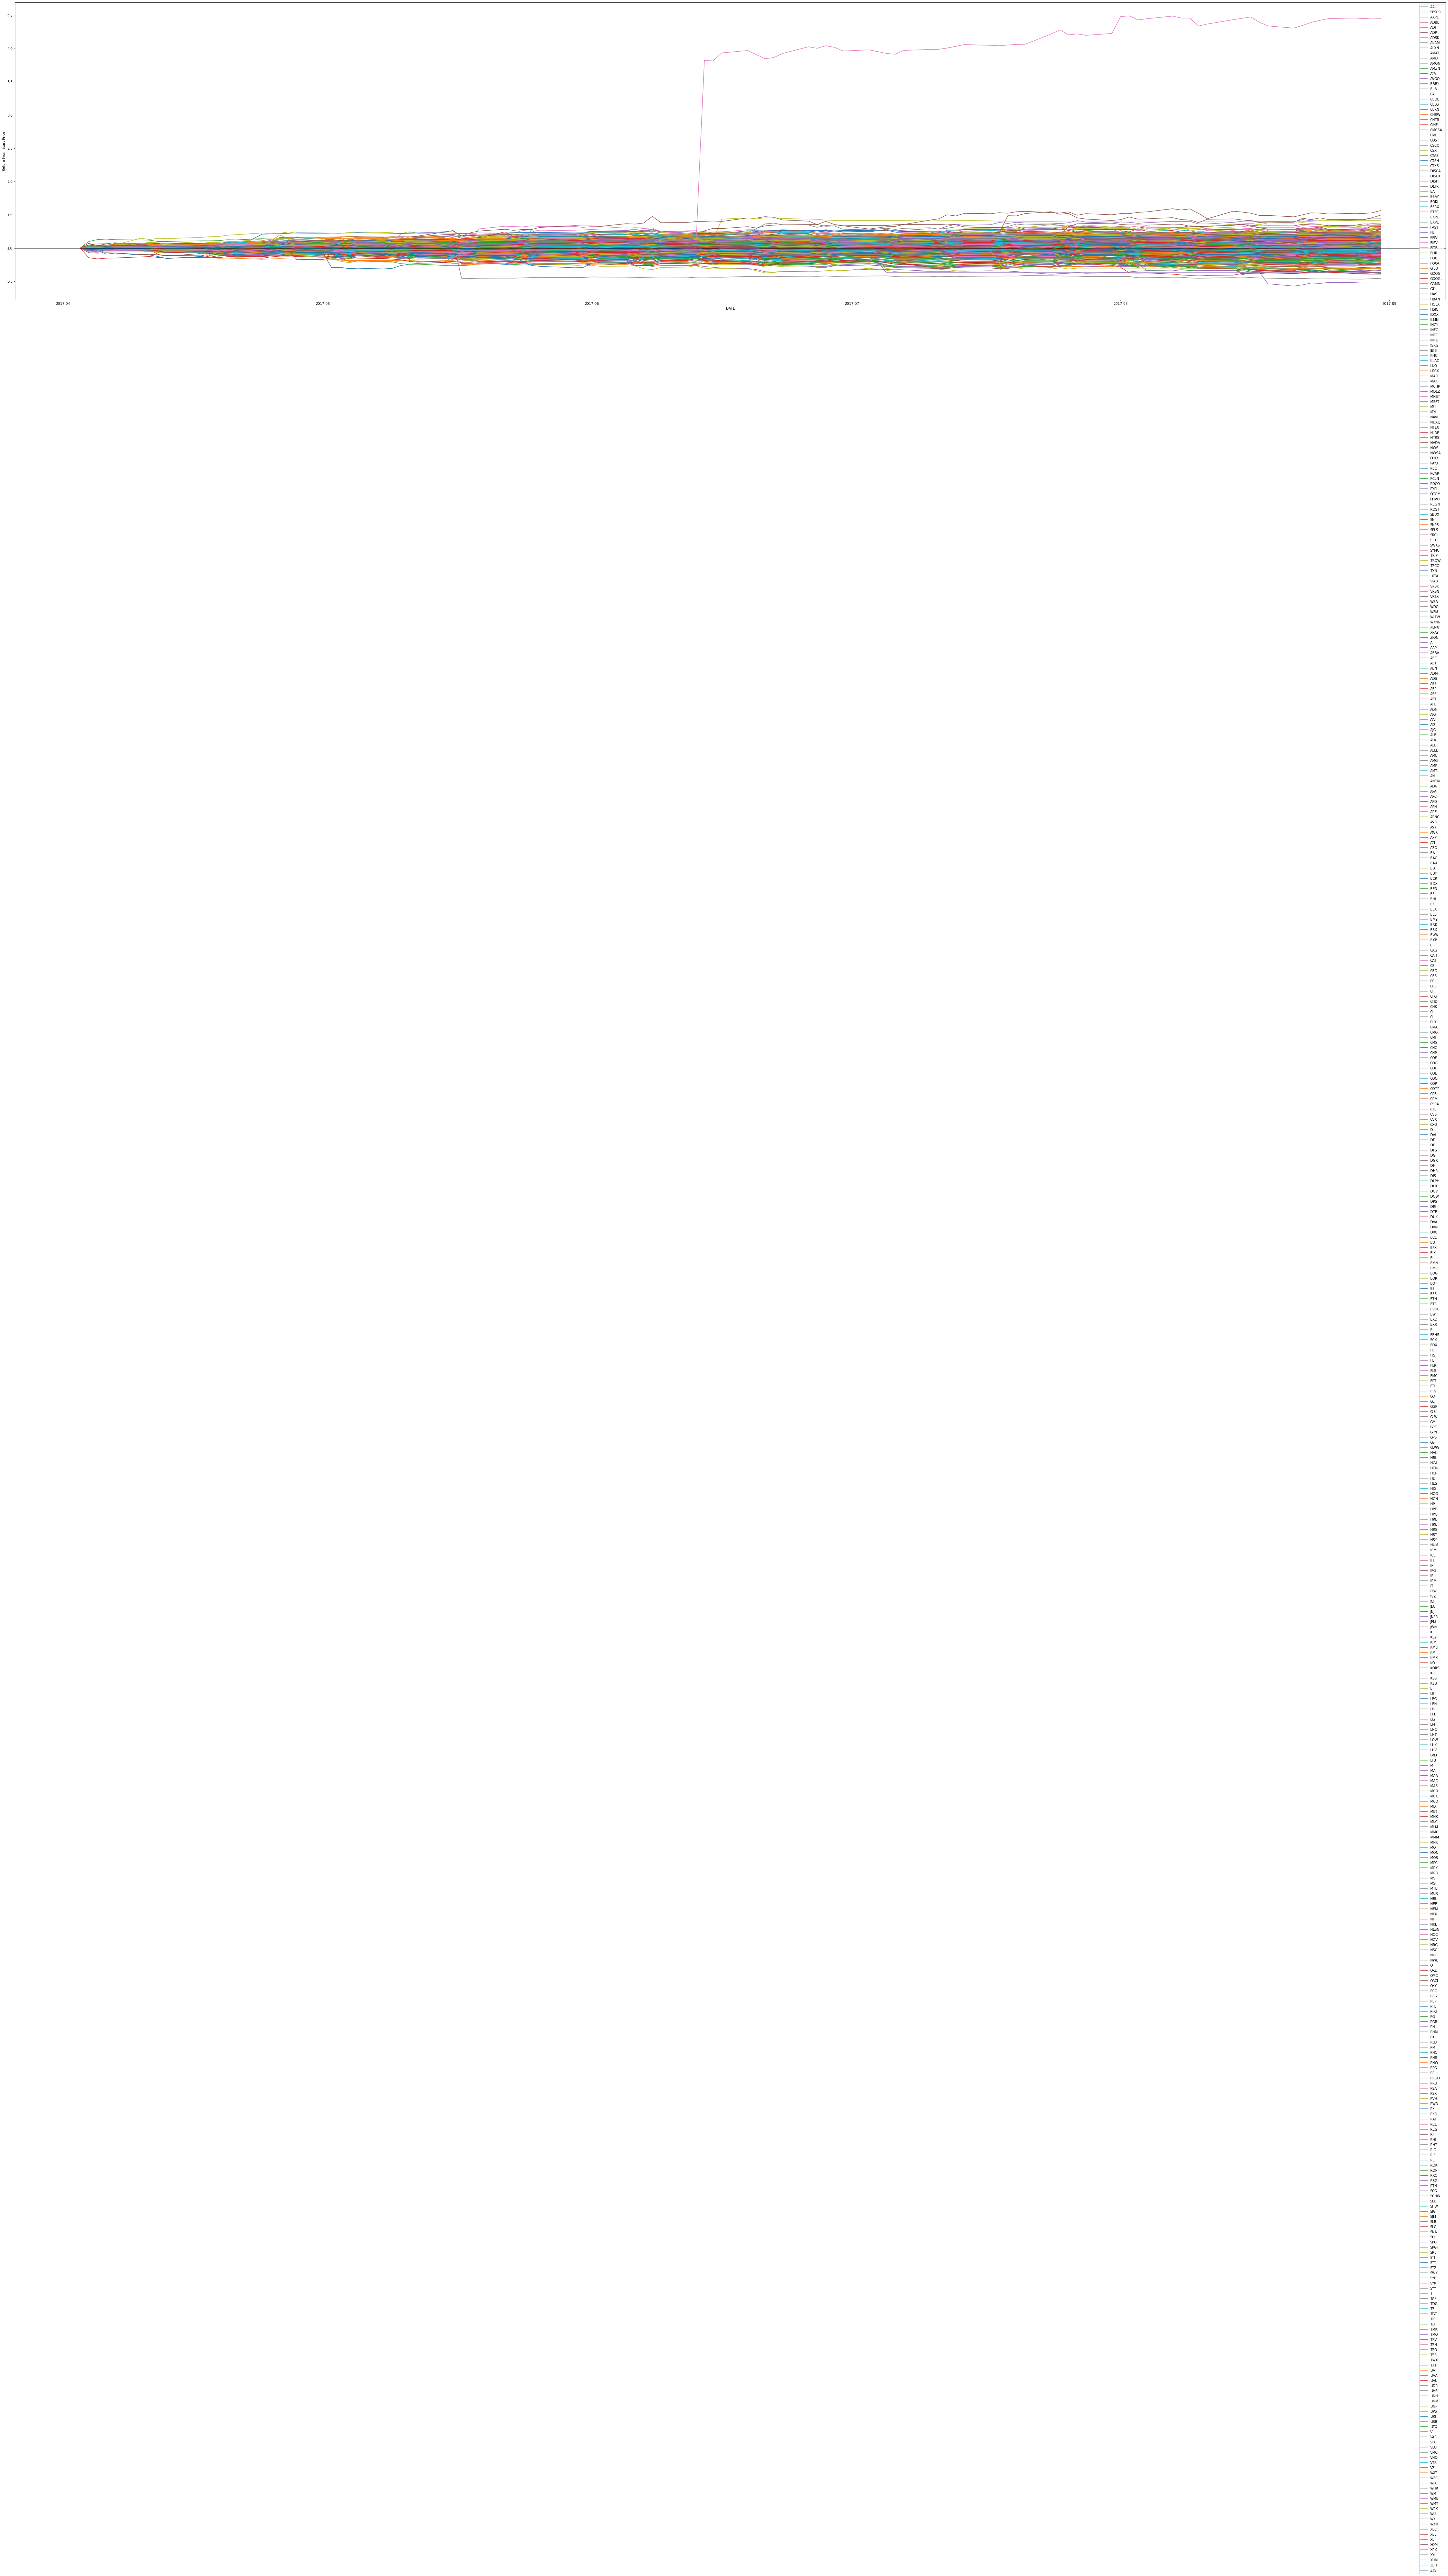

In [23]:
# Check return from start price for all the stocks
returnfstart = df5.apply(lambda x: x / x[0])
returnfstart.plot(figsize=(75,16)).axhline(1, lw=1, color='black')
plt.ylabel('Return From Start Price')

Text(0, 0.5, 'Daily Percentage Return')

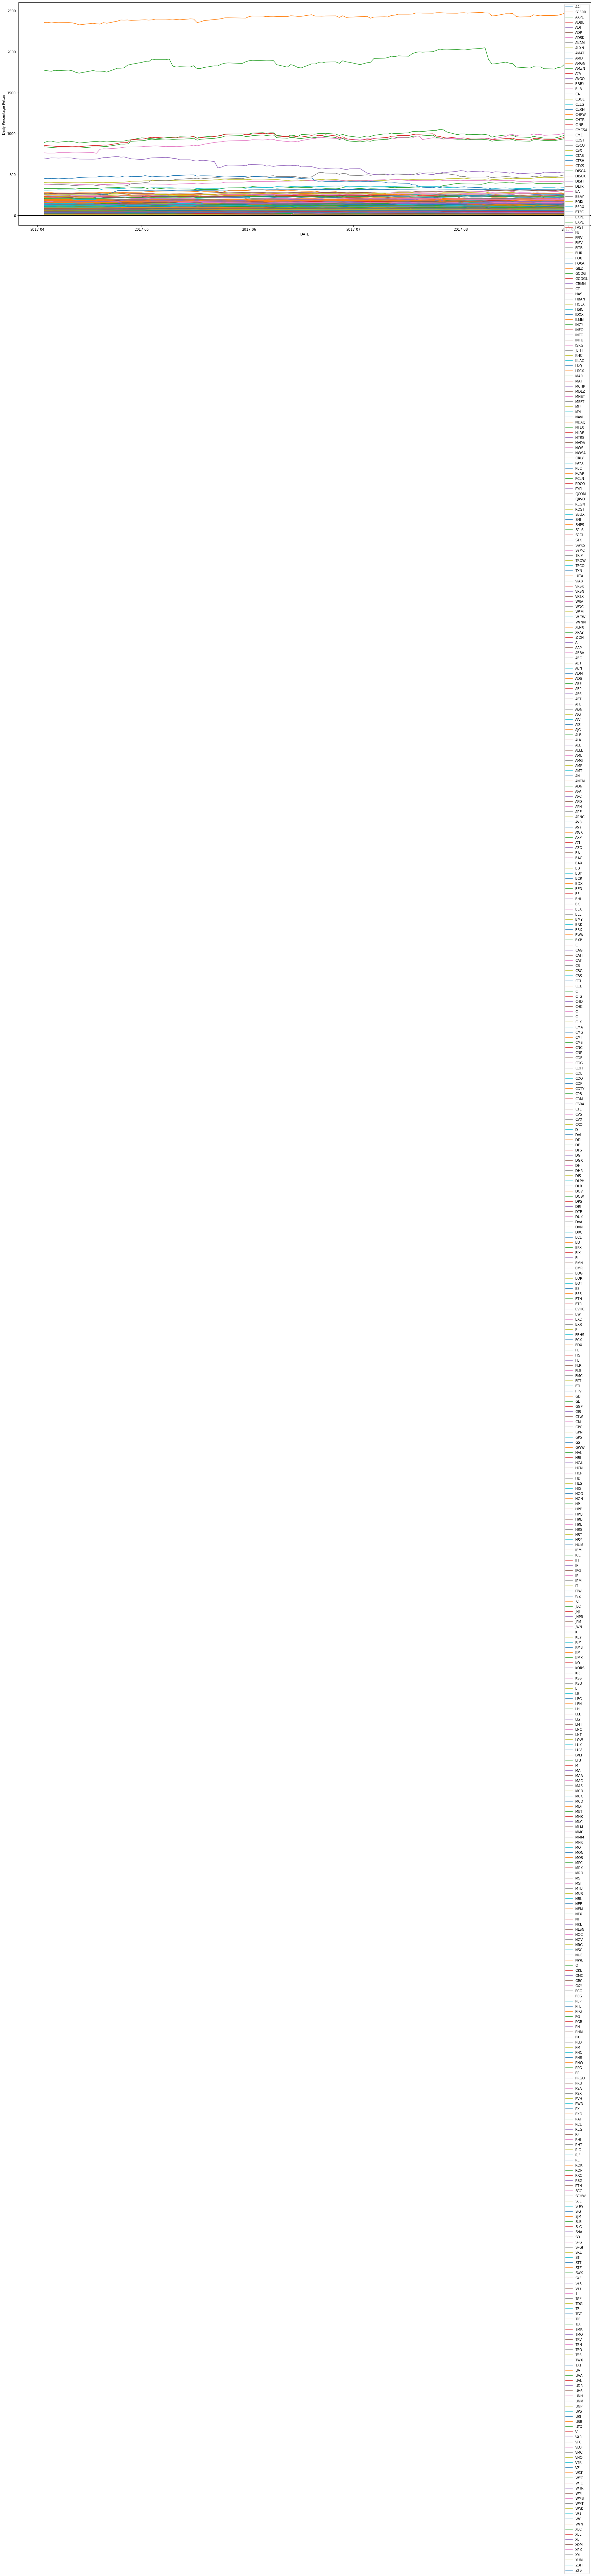

In [24]:
df6=df5.pct_change()
 
df5.plot(figsize=(30,12))
plt.axhline(0, color='black', lw=1)
plt.ylabel('Daily Percentage Return')

In [25]:
df5.describe()

AAL        SP500        AAPL        ADBE         ADI  \
count  106.000000   106.000000  106.000000  106.000000  106.000000   
mean    47.719717  2421.181520  150.372602  141.345755   79.393632   
std      3.272090    40.031479    6.271409    6.950568    1.984853   
min     40.900000  2329.139900  140.680000  129.050000   75.490000   
25%     44.942500  2391.602550  144.597500  135.237500   77.995000   
50%     48.410000  2429.670050  150.065000  142.055000   79.230000   
75%     50.307500  2447.609975  155.237500  147.302500   80.547500   
max     54.220000  2480.600100  163.980000  155.160000   86.130000   

              ADP        ADSK        AKAM        ALXN        AMAT  ...  \
count  106.000000  106.000000  106.000000  106.000000  106.000000  ...   
mean   103.468726  102.977642   50.874151  122.935896   43.287453  ...   
std      4.424074    9.402722    4.889023   11.344494    2.475571  ...   
min     96.460000   83.540000   44.910000   97.700000   37.520000  ...   
25%    101.316250   94.902500   47.402500  117.020000   41.740000  ...   
50%    102.440000  106.730000   49.495000  123.670000   43.675000  ...   
75%    104.587500  110.640000   52.130000  132.172500   44.992500  ...   
max    118.910000  114.970000   62.500000  142.410000   47.450000  ...   

              WYN         XEC         XEL          XL         XOM         XRX  \
count  106.000000  106.000000  106.000000  106.000000  106.000000  106.000000   
mean    97.951406  104.527208   46.692689   43.034094   80.753389   19.350755   
std      5.372775   10.630346    1.520344    1.722385    1.856846   11.739667   
min     84.010000   91.300000   44.390000   39.370000   76.086300    6.880000   
25%     95.980000   95.020000   45.145000   41.905000   80.182675    7.050000   
50%     99.345000   99.579500   46.855000   43.275000   81.074500   27.937500   
75%    102.092500  116.675000   47.775000   44.302500   82.080000   30.547500   
max    105.380000  121.910000   49.530000   46.670000   83.460000   32.550000   

              XYL         YUM         ZBH         ZTS  
count  106.000000  106.000000  106.000000  106.000000  
mean    54.565895   71.785327  121.467255   60.199583  
std      3.547956    4.083456    5.642329    3.333979  
min     48.870000   63.550000  110.160000   52.550000  
25%     51.580000   69.125000  117.750000   59.723750  
50%     53.960000   73.530000  120.815000   61.565000  
75%     57.027500   74.770000  125.900000   62.557500  
max     62.070000   76.810000  132.650000   63.500000  

[8 rows x 501 columns]

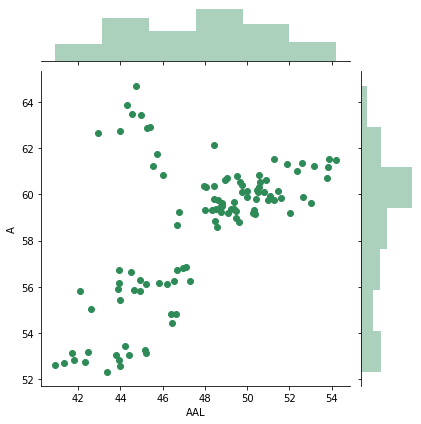

In [23]:
# Check Co-relation between 2 stocks using seaborn library
import seaborn as sns
sns.jointplot('AAL', 'A', df5, kind='scatter', color='seagreen')

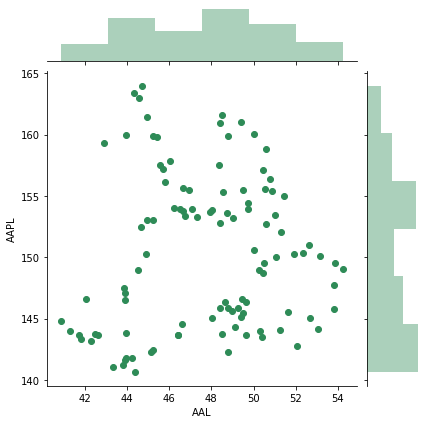

In [28]:
# Check Co-relation between 2 stocks using seaborn library
import seaborn as sns
sns.jointplot('AAL', 'AAPL', df5, kind='scatter', color='seagreen')

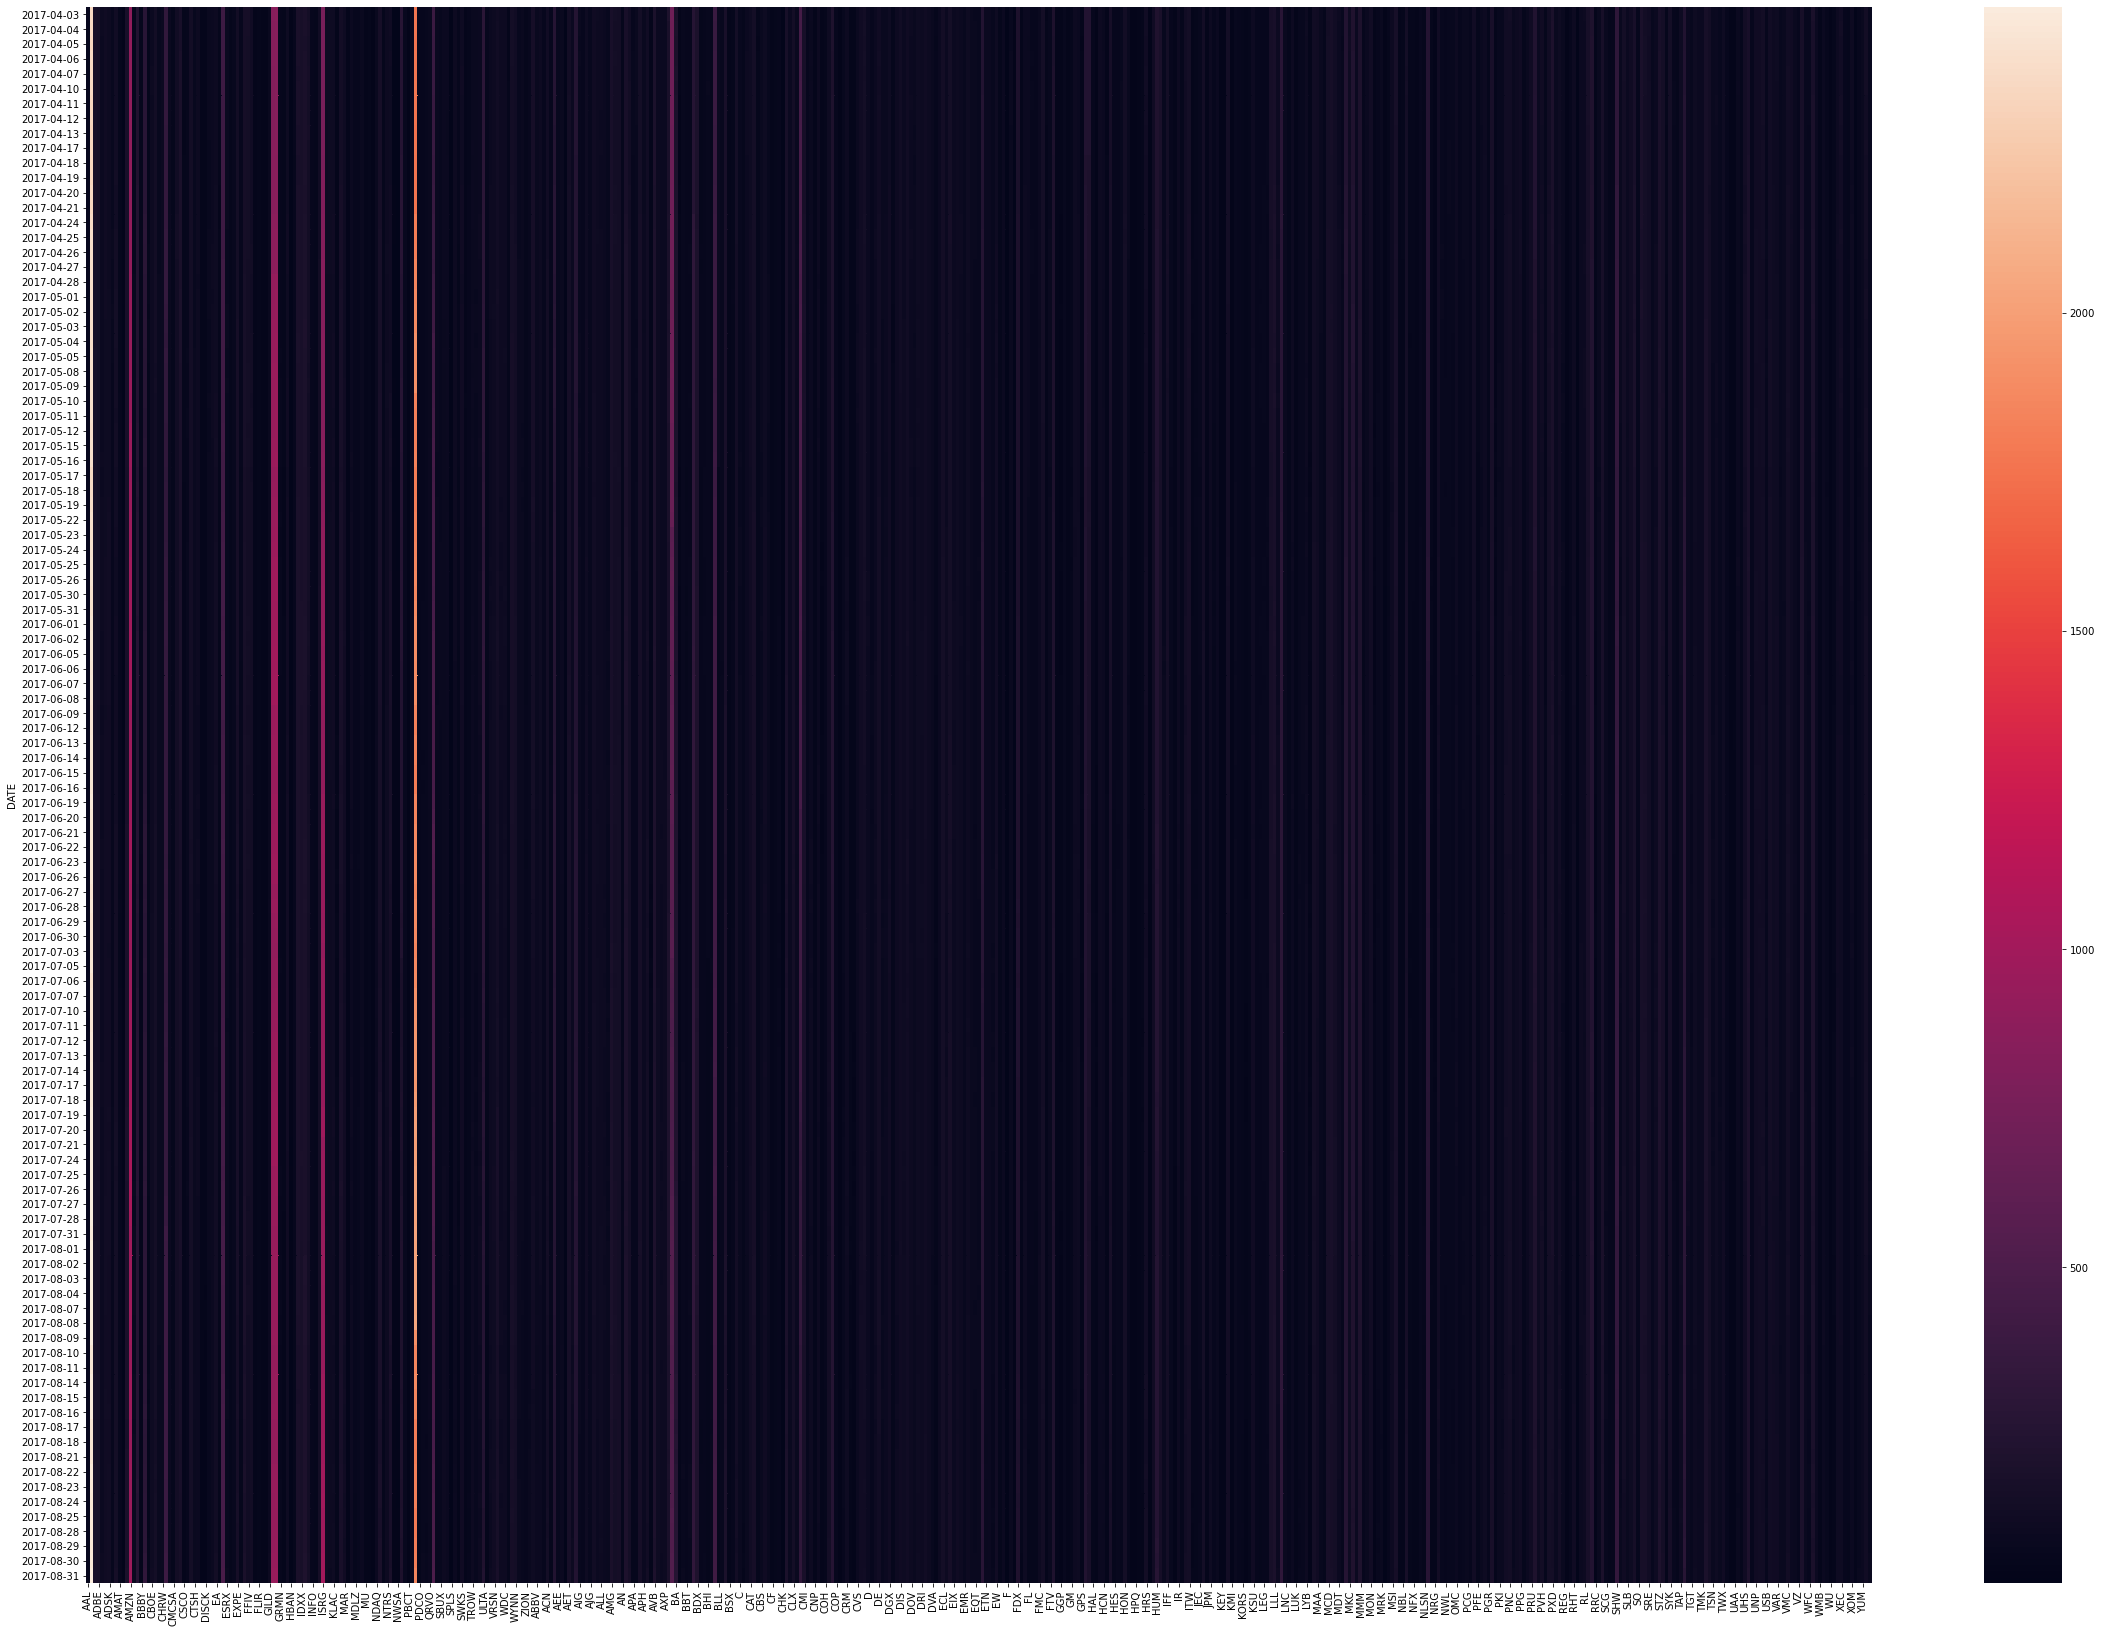

In [26]:
# Use Seaborn to plot Co-relation between all the stocks
plt.figure(figsize=(40,29))
sns.heatmap(df5.dropna())

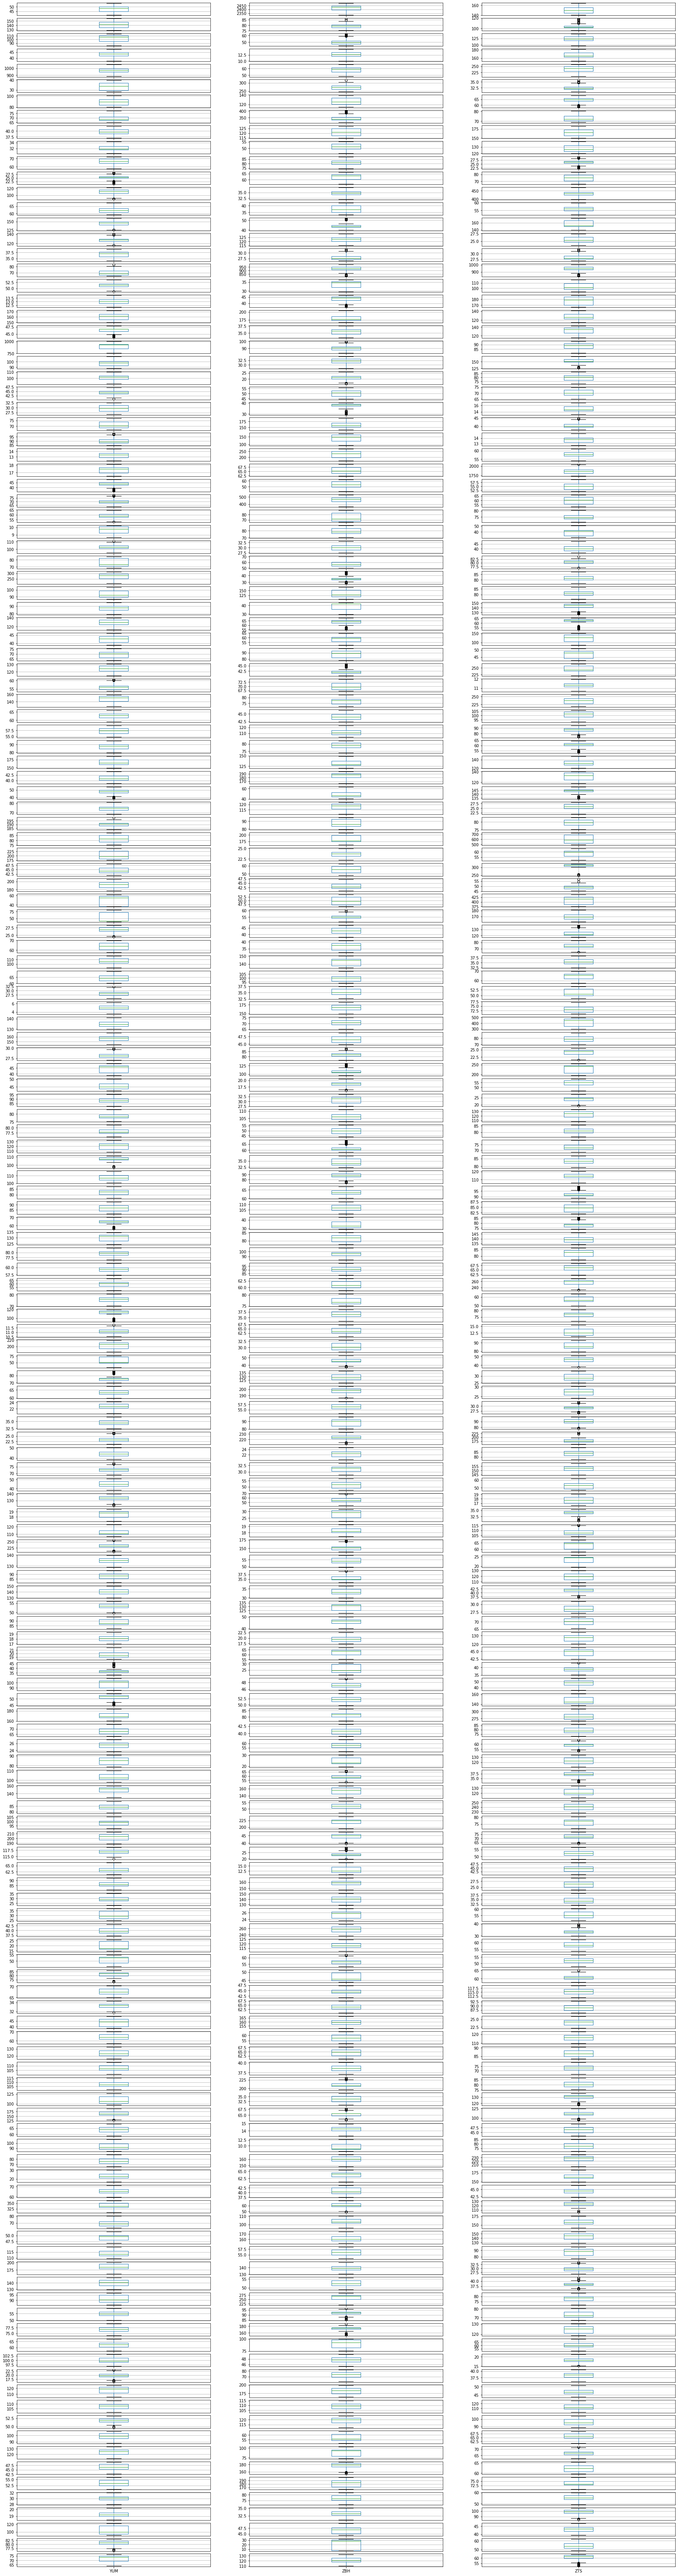

In [27]:
# Outliers visualization using boxplot
fig, axes = plt.subplots(len(df5.columns)//3, 3, figsize=(30, 120))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df5.boxplot(column = df5.columns[i], ax=axis)
        i = i+1 
plt.show()

In [28]:
# Function to perform scaling on thr stock dataset
def standard_scaler(X_train, X_test):
    train_samples, train_nx, train_ny = X_train.shape
    test_samples, test_nx, test_ny = X_test.shape
    
    X_train = X_train.reshape((train_samples, train_nx * train_ny))
    X_test = X_test.reshape((test_samples, test_nx * test_ny))
    
    preprocessor = prep.StandardScaler().fit(X_train)
    X_train = preprocessor.transform(X_train)
    X_test = preprocessor.transform(X_test)
    
    X_train = X_train.reshape((train_samples, train_nx, train_ny))
    X_test = X_test.reshape((test_samples, test_nx, test_ny))
    
    return X_train, X_test

In [39]:
# Function to perfrom pre-processing on the stock dataset
def preprocess_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.to_numpy()
    
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index : index + sequence_length])
        
    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[: int(row), :]
    
    train, result = standard_scaler(train, result)
    
    X_train = train[:, : -1]
    y_train = train[:, -1][: ,-1]
    X_test = result[int(row) :, : -1]
    y_test = result[int(row) :, -1][ : ,-1]

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))  

    return [X_train, y_train, X_test, y_test]

In [40]:
# Import Libraries for Model building
import time
import math
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import numpy as np
import pandas as pd
import sklearn.preprocessing as prep

In [76]:
# Function to build LSTM model -> Apply Dropout -> Create Dense Layer -> Apply Activation function -> 
# Use MSE as loss function -> Calculate compilation time
def build_model(layers):
    model = Sequential()

    # By setting return_sequences to True we are able to stack another LSTM layer
    model.add( LSTM(units=layers[1], return_sequences=True))
    model.add(Dropout(0.4))

    model.add(LSTM(layers[2], return_sequences=False))
    model.add(Dropout(0.3))

    model.add(Dense(units = layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [77]:
# Split stock dataset into train-test dataset
window = 20
X_train, y_train, X_test, y_test = preprocess_data(df5[:: -1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (76, 20, 501)
y_train (76,)
X_test (9, 20, 501)
y_test (9,)


In [78]:
# Call function to build Model
model = build_model([X_train.shape[2], window, 100, 1])

Compilation Time :  0.4996047019958496


In [149]:
# Fit the model
model.fit(
    X_train,
    y_train,
    batch_size=768,
    epochs=300,
    validation_split=0.1,
    verbose=0)

In [150]:
# Calculate test/train score
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.05 MSE (0.22 RMSE)
Test Score: 1.64 MSE (1.28 RMSE)


In [151]:
diff = []
ratio = []
pred = model.predict(X_test)
for u in range(len(y_test)):
    pr = pred[u][0]
    ratio.append((y_test[u] / pr) - 1)
    diff.append(abs(y_test[u] - pr))

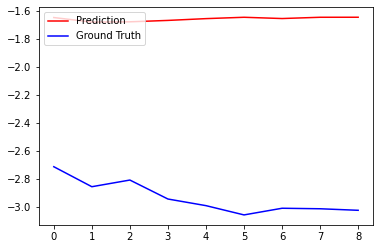

In [152]:
import matplotlib.pyplot as plt2

plt2.plot(pred, color='red', label='Prediction')
plt2.plot(y_test, color='blue', label='Ground Truth')
plt2.legend(loc=2)
plt2.show()

In [154]:
pred

array([[-1.6460865],
       [-1.6783423],
       [-1.6765522],
       [-1.6665919],
       [-1.6538286],
       [-1.6441709],
       [-1.6531731],
       [-1.6441412],
       [-1.6439662]], dtype=float32)

#### Conclusions:

* Most stocks are apparently similar and AMZN, GLID, and ISRG are only similar with each others as seen in     heatmap.

* Most of the stocks showing similar fluctuations in price , only few of them are unique.

* Many of the stocks are moving together, only some of them like SP500, AAPL, c(ADSK, AKAM, AMZN and ATVI) are moving separatly.

* Predictions are not so correct with respect to the actual labels.

## Thanks!!